In [9]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load Dataset

# Load Another Dataset (This has missing dates)

airline = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/airline_passengers.csv',
                      index_col = 'Month', parse_dates = True)

airline.dropna() # Drop all missing data, if there is any
airline.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# EWMA (Exponentially Weighted Moving Average)

In [11]:
# The Exponentially Weighted Moving Average (EWMA) is a powerful statistical tool used in time series analysis,
# particularly for smoothing data and identifying underlying trends. Unlike simple moving averages that give equal
# weight to all observations in the window, EWMA assigns exponentially decreasing weights to older observations.
# This approach allows EWMA to be more responsive to recent changes in the data, making it highly valuable for
# forecasting, and signal processing, among other applications.

<Axes: xlabel='Month'>

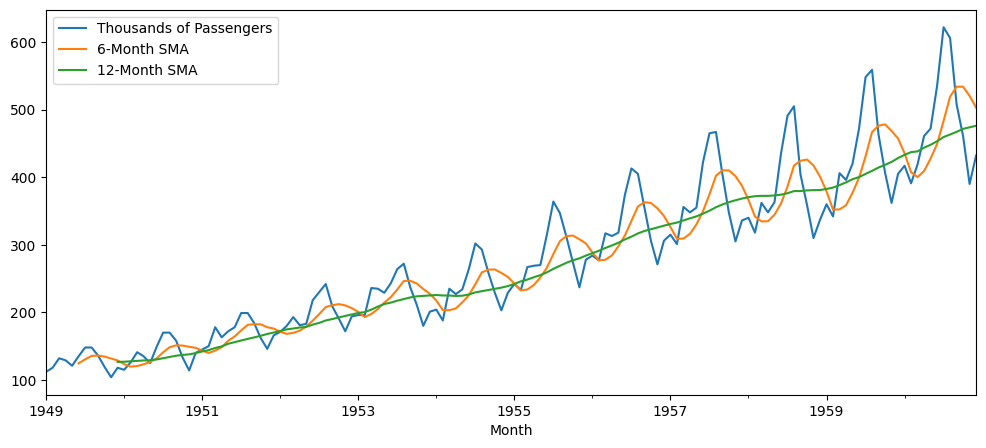

In [12]:
# Global Graph Sizing

from pylab import rcParams
rcParams['figure.figsize'] = 12, 5


# Comparing SMA (rolling) to EWMA

airline['6-Month SMA'] = airline['Thousands of Passengers'].rolling(window = 6).mean() # This is a 6-Month SMA
airline['12-Month SMA'] = airline['Thousands of Passengers'].rolling(window = 12).mean() # This is a 12-Month SMA

airline.plot()

# Responsiveness to Recent Data: By placing more weight on recent observations, EWMA can quickly adapt to changes,
# making it particularly useful for tracking financial markets or economic indicators where recent data may be more indicative of current trends.

<Axes: xlabel='Month'>

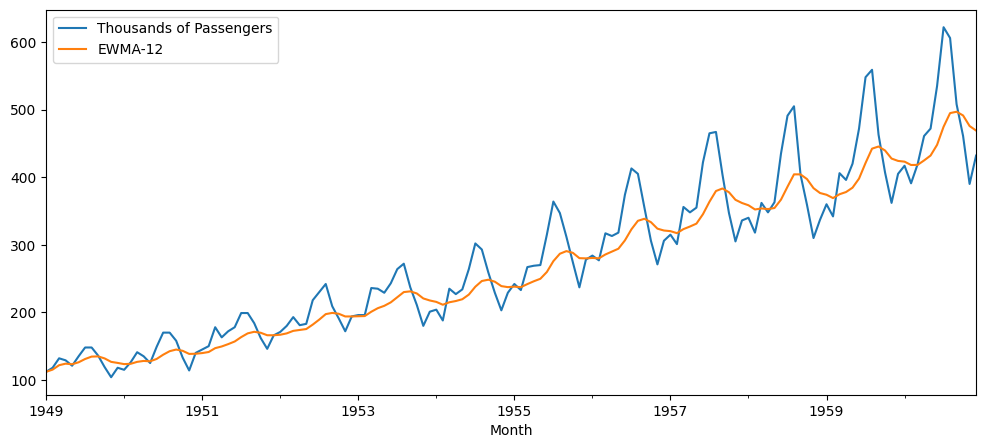

In [13]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span = 12).mean() # span is N EW moving average, 12 months == 1 Year

airline[['Thousands of Passengers', 'EWMA-12']].plot()

<Axes: xlabel='Month'>

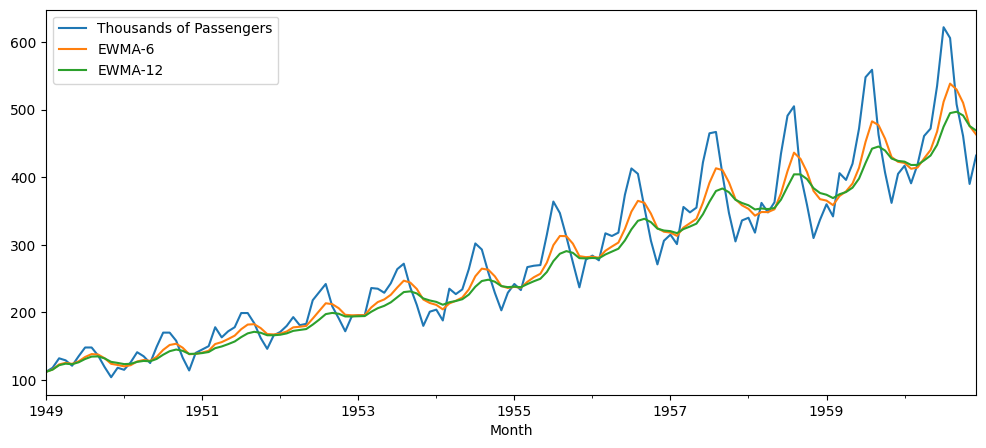

In [14]:
# EWMA Comparison 6 months vs 12 months

airline['EWMA-6'] = airline['Thousands of Passengers'].ewm(span = 6).mean() # span is N EW moving average, 6 months

airline[['Thousands of Passengers', 'EWMA-6', 'EWMA-12']].plot()

# Minimal Lag: Compared to simple moving averages, EWMA introduces less lag because it
# diminishes the influence of older data points more rapidly. This characteristic is crucial for timely decision-making based on the analysis.

# EWMA can handle missing values more gracefully than simple moving averages since it does not require a
# fixed number of observations to calculate the average. Each EWMA value is computed using only the available data up to that point.

<Axes: xlabel='Month'>

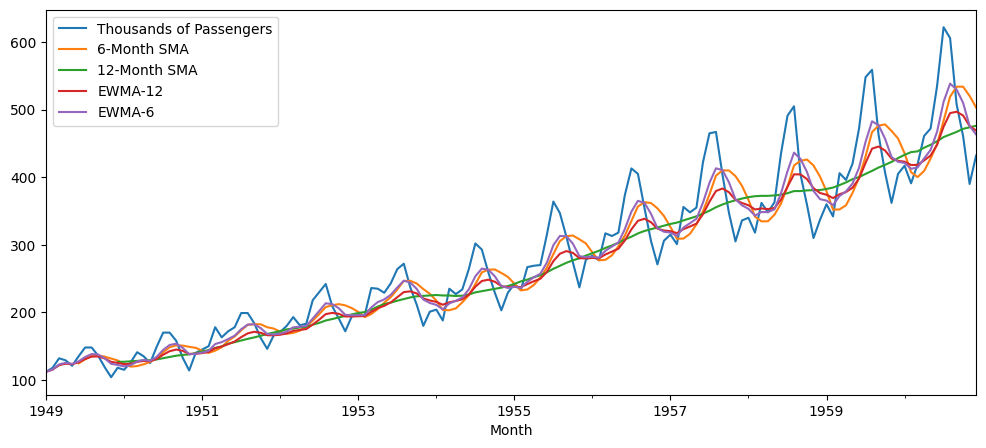

In [15]:
# Overall Comparison SMAs vs EWMAs

airline.plot()

In [16]:
# Great Job!